In [1]:
import json

import pandas as pd
import numpy as np

from eemeter import (
    load_sample,
    # merge_temperature_data,
    get_baseline_data,
    get_reporting_data,
    # segment_timeseries,
    get_feature_hour_of_week,
    get_feature_occupancy,
    get_design_matrix,
    caltrack_hourly_method,
    get_feature_binned_temperatures,
)

from eemeter import (
    merge_features,
    segment_time_series,
    caltrack_hourly_fit_feature_processor,
    caltrack_hourly_prediction_feature_processor,
    compute_occupancy_feature,
    compute_time_features,
    compute_temperature_features,
    compute_temperature_bin_features,
    estimate_hour_of_week_occupancy,
    fit_temperature_bins,
    iterate_segmented_dataset,
    fit_segmented_model,
    fit_hourly_model_segment,
)

import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

/usr/local/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
meter_data, temperature_data, metadata = \
    load_sample('il-electricity-cdd-hdd-hourly')

In [3]:
meter_data.head()

,value
start,
2015-11-22 06:00:00+00:00,0.29
2015-11-22 07:00:00+00:00,1.47
2015-11-22 08:00:00+00:00,0.58
2015-11-22 09:00:00+00:00,0.28
2015-11-22 10:00:00+00:00,1.25


In [4]:
segment_time_series(meter_data.index, 'single').head()

,all
start,
2015-11-22 06:00:00+00:00,1.0
2015-11-22 07:00:00+00:00,1.0
2015-11-22 08:00:00+00:00,1.0
2015-11-22 09:00:00+00:00,1.0
2015-11-22 10:00:00+00:00,1.0


In [5]:
segment_time_series(meter_data.index, 'one_month').head()

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
start,,,,,,,,,,,,
2015-11-22 06:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2015-11-22 07:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2015-11-22 08:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2015-11-22 09:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2015-11-22 10:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [6]:
segment_time_series(meter_data.index, 'three_month').head()

,dec-jan-feb,jan-feb-mar,feb-mar-apr,mar-apr-may,apr-may-jun,may-jun-jul,jun-jul-aug,jul-aug-sep,aug-sep-oct,sep-oct-nov,oct-nov-dec,nov-dec-jan
start,,,,,,,,,,,,
2015-11-22 06:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2015-11-22 07:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2015-11-22 08:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2015-11-22 09:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2015-11-22 10:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [7]:
segment_time_series(meter_data.index, 'three_month_weighted').head()

,dec-jan-feb-weighted,jan-feb-mar-weighted,feb-mar-apr-weighted,mar-apr-may-weighted,apr-may-jun-weighted,may-jun-jul-weighted,jun-jul-aug-weighted,jul-aug-sep-weighted,aug-sep-oct-weighted,sep-oct-nov-weighted,oct-nov-dec-weighted,nov-dec-jan-weighted
start,,,,,,,,,,,,
2015-11-22 06:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5
2015-11-22 07:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5
2015-11-22 08:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5
2015-11-22 09:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5
2015-11-22 10:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5


In [8]:
time_features = compute_time_features(meter_data.index)
time_features.head()

,hour_of_week
start,
2015-11-22 06:00:00+00:00,151
2015-11-22 07:00:00+00:00,152
2015-11-22 08:00:00+00:00,153
2015-11-22 09:00:00+00:00,154
2015-11-22 10:00:00+00:00,155


In [9]:
temperature_features = compute_temperature_features(
    meter_data.index, temperature_data,
    heating_balance_points=[50], cooling_balance_points=[65],
    degree_day_method='hourly'
)
temperature_features.head()

,temperature_mean,cdd_65,hdd_50
start,,,
2015-11-22 06:00:00+00:00,21.01,0.0,28.99
2015-11-22 07:00:00+00:00,20.35,0.0,29.65
2015-11-22 08:00:00+00:00,19.38,0.0,30.62
2015-11-22 09:00:00+00:00,19.02,0.0,30.98
2015-11-22 10:00:00+00:00,17.82,0.0,32.18


In [10]:
merged_data = merge_features([  # not sure how to represent this in platform
    meter_data.value.to_frame('meter_value'),
    temperature_features,
    time_features
])
merged_data.head()

,meter_value,temperature_mean,cdd_65,hdd_50,hour_of_week
start,,,,,
2015-11-22 06:00:00+00:00,0.29,21.01,0.0,28.99,151
2015-11-22 07:00:00+00:00,1.47,20.35,0.0,29.65,152
2015-11-22 08:00:00+00:00,0.58,19.38,0.0,30.62,153
2015-11-22 09:00:00+00:00,0.28,19.02,0.0,30.98,154
2015-11-22 10:00:00+00:00,1.25,17.82,0.0,32.18,155


In [11]:
baseline_data, warnings = get_baseline_data(
    data=merged_data, end=merged_data.index[-1], max_days=365)
baseline_data.shape

(8761, 5)

In [12]:
segmentation = segment_time_series(baseline_data.index, 'three_month_weighted')
segmentation.head()

,dec-jan-feb-weighted,jan-feb-mar-weighted,feb-mar-apr-weighted,mar-apr-may-weighted,apr-may-jun-weighted,may-jun-jul-weighted,jun-jul-aug-weighted,jul-aug-sep-weighted,aug-sep-oct-weighted,sep-oct-nov-weighted,oct-nov-dec-weighted,nov-dec-jan-weighted
start,,,,,,,,,,,,
2017-02-08 06:00:00+00:00,0.5,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-02-08 07:00:00+00:00,0.5,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-02-08 08:00:00+00:00,0.5,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-02-08 09:00:00+00:00,0.5,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-02-08 10:00:00+00:00,0.5,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
occupancy_lookup = estimate_hour_of_week_occupancy(baseline_data, segmentation=segmentation)
occupancy_lookup.head()

,dec-jan-feb-weighted,jan-feb-mar-weighted,feb-mar-apr-weighted,mar-apr-may-weighted,apr-may-jun-weighted,may-jun-jul-weighted,jun-jul-aug-weighted,jul-aug-sep-weighted,aug-sep-oct-weighted,sep-oct-nov-weighted,oct-nov-dec-weighted,nov-dec-jan-weighted
hour_of_week,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
# now do binned temperatures
temperature_bins = fit_temperature_bins(
    baseline_data, segmentation=segmentation,
    default_bins=[30, 45, 55, 65, 75, 90],
    min_temperature_count=20
)
temperature_bins

,dec-jan-feb-weighted,jan-feb-mar-weighted,feb-mar-apr-weighted,mar-apr-may-weighted,apr-may-jun-weighted,may-jun-jul-weighted,jun-jul-aug-weighted,jul-aug-sep-weighted,aug-sep-oct-weighted,sep-oct-nov-weighted,oct-nov-dec-weighted,nov-dec-jan-weighted
bin_endpoints,,,,,,,,,,,,
30,True,True,True,True,False,False,False,False,False,True,True,True
45,True,True,True,True,True,False,False,False,True,True,True,True
55,True,True,True,True,True,True,True,True,True,True,True,True
65,True,True,True,True,True,True,True,True,True,True,True,True
75,False,False,True,True,True,True,True,True,True,True,True,False
90,False,False,False,False,True,True,True,True,True,True,False,False


In [15]:
segmented_dataset_dict = {
    segment_name: segmented_data
    for segment_name, segmented_data in iterate_segmented_dataset(
        baseline_data, segmentation=segmentation,
        feature_processor=caltrack_hourly_fit_feature_processor,
        feature_processor_kwargs={
            'occupancy_lookup': occupancy_lookup,
            'temperature_bins': temperature_bins,
        },
    )
}

In [16]:
segmented_model = fit_segmented_model(
    segmented_dataset_dict, fit_hourly_model_segment,
    prediction_segment_type='one_month',
    prediction_segment_name_mapping={
        'jan': 'dec-jan-feb-weighted',
        'feb': 'jan-feb-mar-weighted',
        'mar': 'feb-mar-apr-weighted',
        'apr': 'mar-apr-may-weighted',
        'may': 'apr-may-jun-weighted',
        'jun': 'may-jun-jul-weighted',
        'jul': 'jun-jul-aug-weighted',
        'aug': 'jul-aug-sep-weighted',
        'sep': 'aug-sep-oct-weighted',
        'oct': 'sep-oct-nov-weighted',
        'nov': 'oct-nov-dec-weighted',
        'dec': 'nov-dec-jan-weighted',
    },
    prediction_feature_processor=caltrack_hourly_prediction_feature_processor,
    prediction_feature_processor_kwargs={
        'occupancy_lookup': occupancy_lookup,
        'temperature_bins': temperature_bins,
    },
)

In [17]:
reporting_meter_data, warnings = get_reporting_data(
    data=meter_data, start=meter_data.index[0], max_days=365)

reporting_temperature_data, warnings = get_reporting_data(
    data=temperature_data, start=meter_data.index[0], max_days=365)

reporting_prediction_index = reporting_meter_data.index

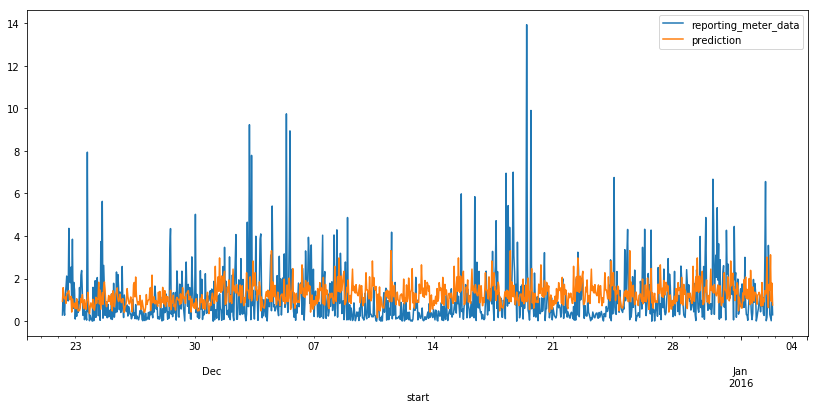

In [18]:
prediction = segmented_model.predict(reporting_prediction_index, reporting_temperature_data)
pd.DataFrame({
    'reporting_meter_data': reporting_meter_data.value,
    'prediction': prediction,
})[:1000].plot(figsize=(14, 6))

what is the output of make design matrix?

get_design_matrix()
pass baseline data, segmentation, occupancy lookup, bins



In [20]:
preprocessors_fit

NameError: name 'preprocessors_fit' is not defined

In [ ]:
design_matrix.shape

In [ ]:
design_matrix.head()

In [ ]:
preprocessors = {
    'segment_timeseries': {
        'function': segment_timeseries,
        'kwargs': {'segment_type': 'three_month_weighted'}
    },
    'get_feature_hour_of_week': {
        'function': get_feature_hour_of_week,
        'kwargs': {}
    },
    'get_feature_occupancy': {
        'function': get_feature_occupancy,
        'kwargs': {'threshold': 0.6}
    },
    'get_feature_binned_temperatures': {
        'function': get_feature_binned_temperatures,
        'kwargs': {}
    }
}
formula = (
    'meter_value ~ C(hour_of_week) - 1 + '
    'bin_0:occupancy + '
    'bin_1:occupancy + bin_2:occupancy + '
    'bin_3:occupancy + bin_4:occupancy + '
    'bin_5:occupancy + bin_6:occupancy'
)
model_fit = caltrack_hourly_method(
    baseline_data, formula, preprocessors)

In [ ]:
model_fit

In [ ]:
model_fit.__dict__

In [ ]:
results, design_matrix, warnings = model_fit.model.predict(baseline_data)

In [ ]:
design_matrix.shape

In [ ]:
design_matrix.head()

In [ ]:
results.shape

In [ ]:
results.head()

meter data, temperature data

-> merge into meter data/temperature data single

merged data

-> baseline

baseline merged data

-> segment

segmented merged data - consider making segments a set of weights over a time index, like a mask. Make input just the time index. main advantage: don't have to repeat data, feature hour of week can be agnostic to segmenting. If a method could work with and without segmenting it's nice to be able to pass the segmenting in as a separate object (potentially none).

missing hour of week warnings can be on whole or parts


-> fit features

occupancy lookup

pivot the occupancy lookup to have rows of hours, columns of model ids and contents of booleans
dict of models like before.

-> compute features

occupancy matrix from occupancy lookup and hour of week features, one column per model?

compute temperature bins - maybe name the bins by their extents? then you could create the bins once for every temperature and use the bins that are 

-> merge features

feature-rich segmented data, fitted features.
(could these be separated into a fit step and a compute step?)
(some features depend on each other like occupancy on time of week.)
(dependency ordering)

-> compute "granular" dataframe

result

-> predict

What did he mean by "replace with design matrix function"? i think he meant column - instead of precomputing just get the column
